### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [ ]:
%tensorflow_version 2.x

In [1]:
import tensorflow as tf
tf.random.set_seed(42)
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [2]:
tf.__version__

'2.0.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the training set and their labels.

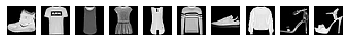

Labels for the above imaages are:
 [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [8]:
labels = []
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    labels.append(np.argmax(trainY[0:10][i]))
plt.show()   
print('Labels for the above imaages are:\n', labels)
    


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [9]:
output_nodes = 10

#Define the model
model = Sequential()

#Input Layer
model.add(Reshape((784,),input_shape=(28,28,)))

#Output Layer
model.add(Dense(output_nodes, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [10]:
model.fit(trainX, trainY, epochs=50, batch_size = trainX.shape[0], verbose=0)

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [11]:
output_nodes = 10

#Define the model
model = Sequential()

#Input Layer
model.add(Reshape((784,),input_shape=(28,28,)))

#Batch Normalizations
model.add(BatchNormalization())

#Output Layer
model.add(Dense(output_nodes, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [12]:
model.fit(trainX, trainY, epochs=50, batch_size = trainX.shape[0], verbose=0)

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [13]:
learning_rate = 0.001
sgd = optimizers.SGD(lr=learning_rate)

# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(trainX, trainY, epochs=50, batch_size = trainX.shape[0], verbose=0)

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [15]:
output_nodes = 10
learning_rate = 0.03
hidden_nodes = 100

In [16]:
#Define the model
model = Sequential()

#Input Layer
model.add(Reshape((784,),input_shape=(28,28,)))
model.add(BatchNormalization())

#Hidden Layers
model.add(Dense(hidden_nodes, activation='sigmoid'))
model.add(Dense(hidden_nodes, activation='sigmoid'))

#Output Layer
model.add(Dense(output_nodes, activation='softmax'))

In [17]:
sgd = optimizers.SGD(lr=learning_rate)

# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [19]:
model.layers

### Run the model

In [20]:
model.fit(trainX, trainY, epochs=50, batch_size = trainX.shape[0], verbose=0)